In [ ]:
from typing import List, Dict, Tuple, Union
import matplotlib.pyplot as plt
from model_ranking.plots import plot_perturbation_sweep
from model_ranking.results import get_summary_results, results_to_arrays

### If you want to plot results with smae style as in the paper please download the 
### ieee.mplstyle file and set the path below
mplstyle_path = "/path/to/ieee.mplstyle"
plt.style.use(mplstyle_path)

# Specify data to plot

In [6]:
source_datasets = ["EPFL", "Hmito", "Rmito"]
### Only a single target dataset should be specified
target = "Hmito"
### Range of perturbation strengths to evaluate
selected_augmentations = {
    "none": [""],
    "DO": ["a005", "a01", "a02", "a03", "a04", "a05"],
}
strength_labels = ["p = 0.05", "p = 0.1", "p = 0.2", "p = 0.3", "p = 0.4", "p = 0.5"]
source_models = {
    "EPFL": "E_model",
    "Hmito": "Hm_model",
    "Rmito": "Rm_model",
}
per_target_norms: Dict[str, Union[List[None], List[Tuple[float,float]]]] ={
    "Hmito": [None],
}

result_folders = {
    "Hmito": "exp1",
}
consis_keys = {
    "Hmito": "HD_consis",
}
perf_key = "F1_eval"
approach="feature_perturbation_consistency"
consis_postfix="median"
perf_postfix="median"
#base_result_path="/path/to/your/results/directory"
base_result_path = "/g/kreshuk/talks/CRank_results/Semantic/Mitochondria"

# Load Data

In [7]:
consis_str, _, NA_perf = get_summary_results(
    source_data=source_datasets,
    target_data=[target],
    source_models=source_models,
    selected_augmentations=selected_augmentations,
    selected_norms=per_target_norms,
    consis_keys=consis_keys,
    perf_key=perf_key,
    per_target_norms=True,
    result_folders=result_folders,
    approach=approach,
    consis_postfix=consis_postfix,
    perf_postfix=perf_postfix,
    base_seg_dir=base_result_path,
)
consis_scores, NA_perf_scores = results_to_arrays(
    consis_str,
    NA_perf,
    "DO",
    len(selected_augmentations["DO"]),
)

Source: EPFL


100%|██████████| 1/1 [00:00<00:00,  6.94it/s]


Source: Hmito


100%|██████████| 1/1 [00:00<00:00,  9.05it/s]


Source: Rmito


100%|██████████| 1/1 [00:00<00:00,  8.21it/s]


# Plot perturbation sweep

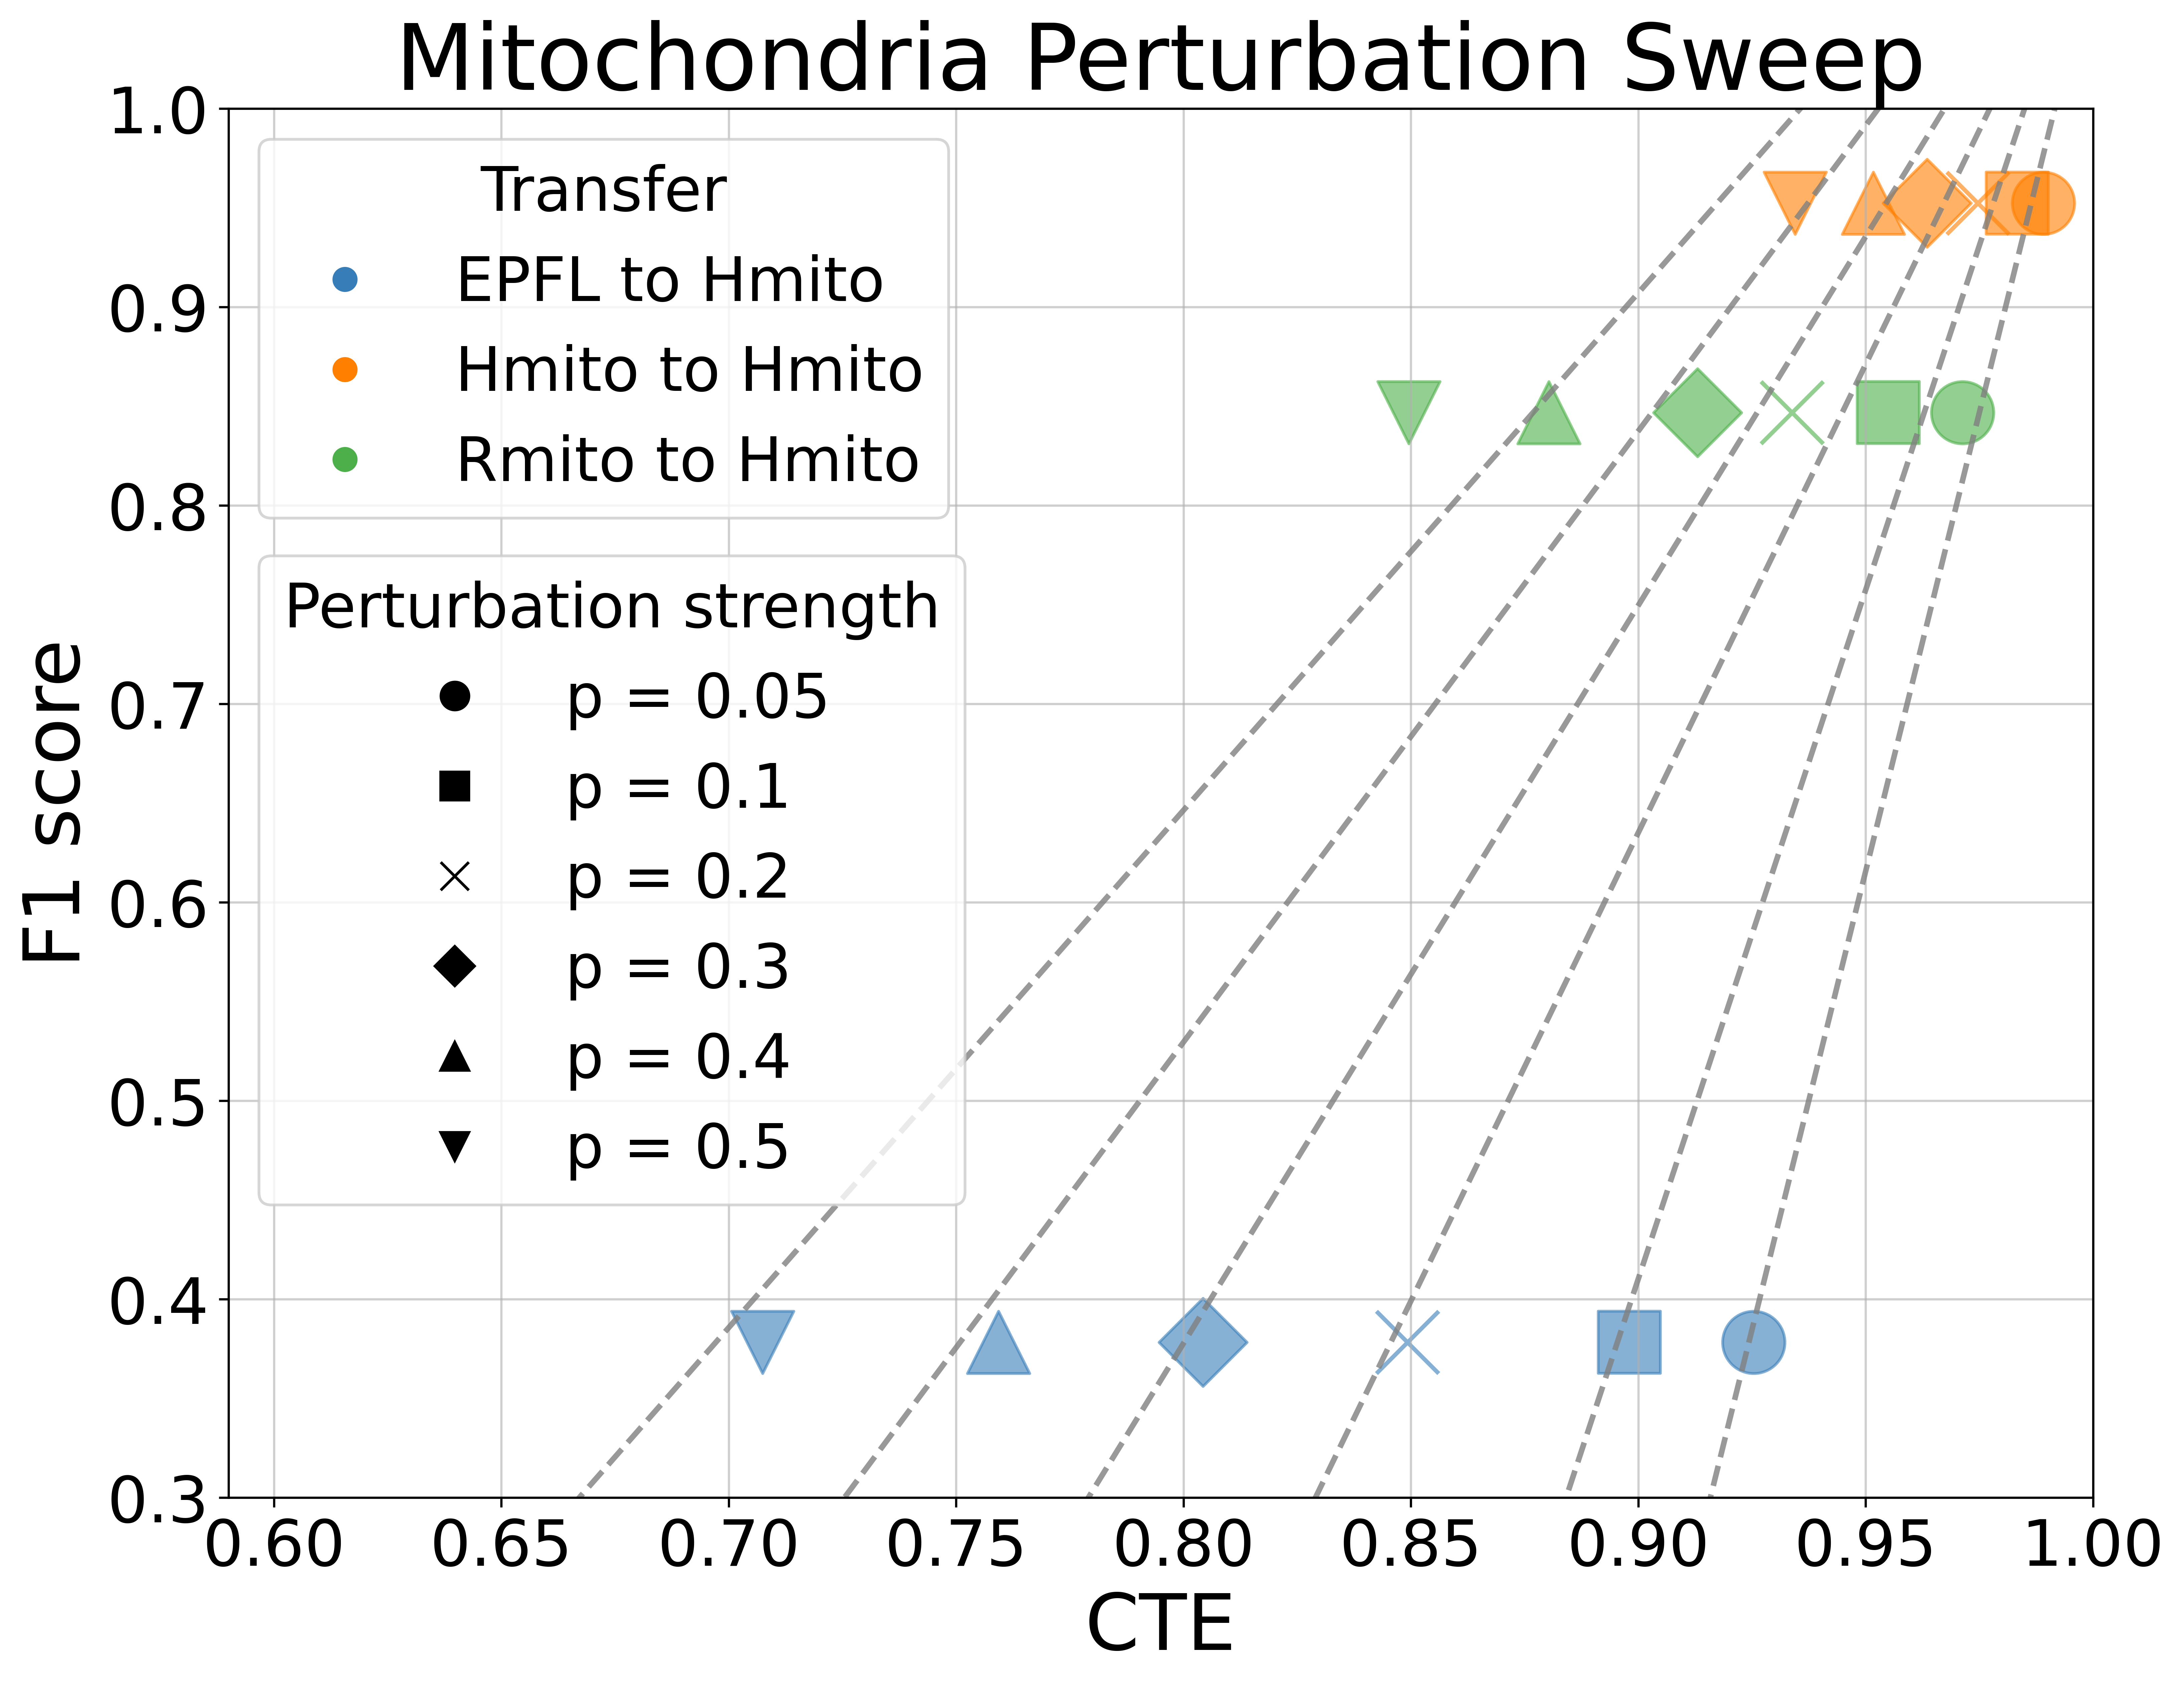

In [ ]:
transfer_labels = ["EPFL to Hmito", "Hmito to Hmito", "Rmito to Hmito"]

plot_perturbation_sweep(
    consis_scores,
    NA_perf_scores,
    x_label="CTE",
    y_label="F1 score",
    title="Mitochondria Perturbation Sweep",
    transfer_labels=transfer_labels,
    perturbation_labels=strength_labels,
    style=mplstyle_path,
)